# Data checks
- Create a subset of the training data (randomized 100,000 rows for training data set while keeping the index is same for the numerical, categorical and date data)
- Create a subset of the test data (randomized 30,000 rows for the test data set while keeping the index same for the numerical, categorical and date data)
- Missing values
- Identify duplicates
- Identify outliers
- Box plot, IQR, Z score
- Data types that are correct
- Incorrect or impossible values

# Prepare the test dataset

In [6]:
import numpy as np

total_rows = 1184687  # Total rows including header
sample_size = 100000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep = sorted(np.random.choice(np.arange(1, total_rows), size=sample_size, replace=False))


In [8]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows))
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [10]:
import pandas as pd

def read_aligned_sample(file_path, rows_to_skip):
    return pd.read_csv(file_path, skiprows=rows_to_skip, low_memory=False)

# Read all files using the same rows
sampled_data = {
    'train_numerical': read_aligned_sample('train_numeric.csv', rows_to_skip),
    'train_categorical': read_aligned_sample('train_categorical.csv', rows_to_skip),
    'train_date': read_aligned_sample('train_date.csv', rows_to_skip)
}


In [11]:
# Printing the shape of the sampled numerical, categorical and date data
for key, df in sampled_data.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")


train_numerical: (99906, 970), First ID: 70
train_categorical: (99906, 2141), First ID: 70
train_date: (99906, 1157), First ID: 70


In [12]:
import pandas as pd

# Save
pd.Series(rows_to_keep).to_csv("train_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_loaded = pd.read_csv("train_rows_to_keep.csv")["row_index"].tolist()


In [13]:
total_rows = 1184687  # adjust to the dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep))


In [14]:
preview_files = {
    'train_numerical': 'train_numeric.csv',
    'train_categorical': 'train_categorical.csv',
    'train_date': 'train_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects)
preview_data['train_numerical'].head()




,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,70,0.062,0.071,-0.179,-0.216,0.161,0.025,-0.022,-0.112,-0.174,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
1,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,295,-0.049,-0.071,-0.015,0.003,-0.013,0.116,0.008,0.088,-0.133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
preview_data['train_categorical'].head()


,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
preview_data['train_date'].head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,70,187.57,187.57,187.57,187.57,187.57,187.57,187.57,187.57,187.57,...,NaN,NaN,NaN,NaN,NaN,188.97,188.97,188.97,188.97,188.97
1,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,295,702.76,702.76,702.76,702.76,702.76,702.76,702.76,702.76,702.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Count Total NaNs in Each Reduced DataFrame
for name, df in sampled_data.items():
    total_nans = df.isna().sum().sum()
    print(f"Total NaNs in {name}: {total_nans}")


Total NaNs in train_numerical: 78404853
Total NaNs in train_categorical: 208099075
Total NaNs in train_date: 94969494


In [18]:
#Count NaNs Per Column
nan_counts = {}
for name, df in sampled_data.items():
    nan_counts[name] = (
        df.isna().sum()
        .reset_index()
        .rename(columns={"index": "column", 0: "NaN_count"})
    )
nan_counts["train_numerical"]


,column,NaN_count
0,Id,0
1,L0_S0_F0,43130
2,L0_S0_F2,43130
3,L0_S0_F4,43130
4,L0_S0_F6,43130
...,...,...
965,L3_S51_F4256,94905
966,L3_S51_F4258,94905
967,L3_S51_F4260,94905
968,L3_S51_F4262,94905


In [19]:
# NaN counts for categorical 
nan_counts["train_categorical"]


,column,NaN_count
0,Id,0
1,L0_S1_F25,99905
2,L0_S1_F27,99905
3,L0_S1_F29,99905
4,L0_S1_F31,99905
...,...,...
2136,L3_S49_F4234,99904
2137,L3_S49_F4235,99904
2138,L3_S49_F4237,99904
2139,L3_S49_F4239,99904


In [20]:
# NaN counts for date
nan_counts["train_date"]

,column,NaN_count
0,Id,0
1,L0_S0_D1,43130
2,L0_S0_D3,43130
3,L0_S0_D5,43130
4,L0_S0_D7,43130
...,...,...
1152,L3_S51_D4255,94905
1153,L3_S51_D4257,94905
1154,L3_S51_D4259,94905
1155,L3_S51_D4261,94905


In [21]:
#Count Rows With Any or All NaNs
for name, df in sampled_data.items():
    rows_with_any_nan = df.isna().any(axis=1).sum()
    rows_with_all_nan = df.isna().all(axis=1).sum()
    print(f"\n{name}:")
    print(f"  Rows with ≥1 NaN: {rows_with_any_nan}")
    print(f"  Rows with all NaN: {rows_with_all_nan}")



train_numerical:
  Rows with ≥1 NaN: 99906
  Rows with all NaN: 0

train_categorical:
  Rows with ≥1 NaN: 99906
  Rows with all NaN: 0

train_date:
  Rows with ≥1 NaN: 99906
  Rows with all NaN: 0


In [22]:
# Percentage of NaN counts for train_numerical
nan_counts_numeric = (
    sampled_data['train_numerical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_numeric["NaN_pct"] = nan_counts_numeric["NaN_count"] / len(sampled_data['train_numerical']) * 100
nan_counts_numeric





,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_F0,43130,43.170580
2,L0_S0_F2,43130,43.170580
3,L0_S0_F4,43130,43.170580
4,L0_S0_F6,43130,43.170580
...,...,...,...
965,L3_S51_F4256,94905,94.994295
966,L3_S51_F4258,94905,94.994295
967,L3_S51_F4260,94905,94.994295
968,L3_S51_F4262,94905,94.994295


In [23]:
nan_counts_categorical = (
    sampled_data['train_categorical'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_categorical["NaN_pct"] = nan_counts_categorical["NaN_count"] / len(sampled_data['train_categorical']) * 100
nan_counts_categorical


,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S1_F25,99905,99.998999
2,L0_S1_F27,99905,99.998999
3,L0_S1_F29,99905,99.998999
4,L0_S1_F31,99905,99.998999
...,...,...,...
2136,L3_S49_F4234,99904,99.997998
2137,L3_S49_F4235,99904,99.997998
2138,L3_S49_F4237,99904,99.997998
2139,L3_S49_F4239,99904,99.997998


In [24]:
nan_counts_date = (
    sampled_data['train_date'].isna().sum()
    .reset_index()
    .rename(columns={"index": "column", 0: "NaN_count"})
)

nan_counts_date["NaN_pct"] = nan_counts_date["NaN_count"] / len(sampled_data['train_date']) * 100
nan_counts_date

,column,NaN_count,NaN_pct
0,Id,0,0.000000
1,L0_S0_D1,43130,43.170580
2,L0_S0_D3,43130,43.170580
3,L0_S0_D5,43130,43.170580
4,L0_S0_D7,43130,43.170580
...,...,...,...
1152,L3_S51_D4255,94905,94.994295
1153,L3_S51_D4257,94905,94.994295
1154,L3_S51_D4259,94905,94.994295
1155,L3_S51_D4261,94905,94.994295


In [25]:
# Average NaNs per row (how many missing values each row has on average) 

nan_avg_per_row_numerical = sampled_data['train_numerical'].isna().sum(axis=1).mean()
nan_avg_per_row_categorical = sampled_data['train_categorical'].isna().sum(axis=1).mean()
nan_avg_per_row_date = sampled_data['train_date'].isna().sum(axis=1).mean()
print("Average NaNs per row numerical:", nan_avg_per_row_numerical.round(2))
print("Average NaNs per row categorical:", nan_avg_per_row_categorical.round(2))
print("Average NaNs per row date:", nan_avg_per_row_date.round(2))

Average NaNs per row numerical: 784.79
Average NaNs per row categorical: 2082.95
Average NaNs per row date: 950.59


## The data checks shows that there is a large number of missing values in the sampled 100,000 data frame for all three files (numerical, categorical, and date).  This will pose a significant issue for logistic regression which is sensitive to NaN or missing values. Must drop rows that have lots of NaNs, and/or use PCA and/or L1 regression that will reduce factors that are not important to zero.

# Prepare the test data set

In [43]:
total_rows_test = 1183748  # Total rows including header
sample_size_test = 30000

# Generate a shared random sample of row indices to KEEP (excluding the header row)
rows_to_keep_test = sorted(np.random.choice(np.arange(1, total_rows_test), size=sample_size_test, replace=False))

In [45]:
# All data rows (excluding header) are 1 to total_rows-1
all_rows = set(range(1, total_rows_test))
rows_to_skip_test = sorted(all_rows - set(rows_to_keep_test))

import pandas as pd

def read_aligned_sample(file_path, rows_to_skip_test):
    return pd.read_csv(file_path, skiprows=rows_to_skip_test, low_memory=False)

# Read all files using the same rows
sampled_data_test = {
    'test_numerical': read_aligned_sample('test_numeric.csv', rows_to_skip_test),
    'test_categorical': read_aligned_sample('test_categorical.csv', rows_to_skip_test),
    'test_date': read_aligned_sample('test_date.csv', rows_to_skip_test)
}

for key, df in sampled_data_test.items():
    print(f"{key}: {df.shape}, First ID: {df.iloc[0, 0]}")

# Save
pd.Series(rows_to_keep_test).to_csv("test_rows_to_keep.csv", index=False, header=["row_index"])

# Load back
rows_to_keep_test_loaded = pd.read_csv("test_rows_to_keep.csv")["row_index"].tolist()

total_rows = 1183748  # adjust to the dataset size (including header row)

# All possible data rows (excluding header row)
all_rows = set(range(1, total_rows_test))

# Skip everything that is not in rows_to_keep
rows_to_skip = sorted(all_rows - set(rows_to_keep_test))

preview_files = {
    'test_numerical': 'test_numeric.csv',
    'test_categorical': 'test_categorical.csv',
    'test_date': 'test_date.csv'
}

preview_data = {}
for name, path in preview_files.items():
    preview_data[name] = pd.read_csv(
        path,
        skiprows=rows_to_skip_test,  # ensure alignment
        nrows=100,              # preview only 100 rows
        low_memory=False
    )
    
# Display nicely in notebook (return df objects for test_numeric)
preview_data['test_numerical'].head()




test_numerical: (30001, 969), First ID: 40
test_categorical: (30001, 2141), First ID: 40
test_date: (30001, 1157), First ID: 40


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
0,40,-0.068,-0.101,-0.015,-0.052,0.118,0.070,0.015,0.128,-0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150,-0.082,-0.078,-0.215,-0.179,0.161,0.025,0.008,0.008,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172,0.056,0.071,-0.197,-0.179,0.118,0.025,-0.015,-0.112,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 

In [46]:
# Display nicely in notebook (return df objects for test_categorical)
preview_data['test_categorical'].head()



,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Display nicely in notebook (return df objects for test_date)
preview_data['test_date'].head()


,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,40,247.44,247.44,247.44,247.44,247.44,247.44,247.44,247.44,247.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150,218.55,218.55,218.55,218.55,218.55,218.55,218.55,218.55,218.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172,169.36,169.36,169.36,169.36,169.36,169.36,169.36,169.36,169.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I am able to sample 30001 rows from the test datasets. This will be used as the test data in the test-train split. 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

num_df = sampled_data['train_numerical'].copy()
cat_df = sampled_data['train_categorical'].copy()
date_df = sampled_data['train_date'].copy()

# Ensure Id exists and is unique 
for df in [num_df, cat_df, date_df]:
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Target ('Response' in train_numeric)
target_col = 'Response' if 'Response' in num_df.columns else None

In [49]:
# Numeric summary (exclude Id/target)
num_cols = [c for c in num_df.columns if c != target_col]
num_summary = num_df[num_cols].describe().T
num_missing = num_df[num_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

# Categorical summary (top categories)
cat_cols = cat_df.columns.tolist()
cat_summary = cat_df[cat_cols].describe(include='object').T  # count, unique, top, freq
cat_missing = cat_df[cat_cols].isna().mean().sort_values(ascending=False).to_frame('missing_pct')

display(num_summary.head(10))
display(num_missing.head(10))
display(cat_summary.head(10))
display(cat_missing.head(10))


,count,mean,std,min,25%,50%,75%,max
L0_S0_F0,56776.0,0.000070,0.080374,-0.382,-0.049,0.003,0.056,0.265
L0_S0_F2,56776.0,-0.000069,0.093175,-0.399,-0.056,0.004,0.063,0.295
L0_S0_F4,56776.0,0.001090,0.211915,-0.415,-0.179,-0.033,0.294,0.567
L0_S0_F6,56776.0,0.001066,0.211982,-0.397,-0.179,-0.034,0.294,0.566
L0_S0_F8,56776.0,-0.000521,0.094713,-0.447,-0.056,0.031,0.074,0.335
L0_S0_F10,56776.0,0.001437,0.164182,-0.566,-0.066,0.070,0.116,0.252
L0_S0_F12,56776.0,-0.000007,0.019424,-0.052,-0.015,0.000,0.015,0.089
L0_S0_F14,56776.0,0.000017,0.104602,-0.232,-0.072,-0.032,0.088,0.488
L0_S0_F16,56776.0,0.000164,0.115231,-0.398,-0.082,0.000,0.076,0.490
L0_S0_F18,56776.0,0.000827,0.112645,-0.425,-0.078,0.002,0.077,0.473


,missing_pct
L1_S25_F2181,0.998849
L1_S25_F2184,0.998849
L1_S25_F2187,0.998849
L1_S25_F2190,0.998849
L1_S25_F2193,0.998849
L1_S25_F2196,0.998849
L1_S25_F2199,0.998849
L1_S25_F2202,0.998849
L1_S25_F2718,0.998178
L1_S25_F2724,0.998178


,count,unique,top,freq
L0_S1_F25,1,1,T1,1
L0_S1_F27,1,1,T9,1
L0_S1_F29,1,1,T1,1
L0_S1_F31,1,1,T9,1
L0_S2_F33,26,1,T1,26
L0_S2_F35,26,4,T32,18
L0_S2_F37,26,1,T1,26
L0_S2_F39,26,4,T32,18
L0_S2_F41,26,1,T1,26
L0_S2_F43,26,4,T32,18


,missing_pct
L1_S25_F2057,1.0
L1_S24_F1422,1.0
L3_S30_F3672,1.0
L1_S24_F1432,1.0
L1_S24_F1430,1.0
L1_S24_F1429,1.0
L1_S24_F1427,1.0
L1_S24_F1425,1.0
L1_S24_F1424,1.0
L1_S24_F1420,1.0


# Preprocessing
- Categorical to numerical for both the test and train data: One hot encoder
- Numerical data: imputation, standard scaling (since the data sets are separate don't have to worry to do it after the test train split. Can perform the standard scaling on each test and train data set)
- Compare against minimum – maximum scaling
- Unbalanced data - SMOTE (Synthetic Minority Over-sampling Technique) will be investigated later, if needed. 

In [55]:
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

# Grab the sampled dataframes
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()

test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

# Set 'Id' as index if present (Bosch has Id as first col)
for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

# Separate target and drop it from numeric features 
assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y_train = train_num['Response'].copy()
train_num = train_num.drop(columns=['Response'])

# Align columns & drop all-NaN columns safely
# Ensure test has all train columns (add missing as NaN)
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

# Drop numeric columns that are ALL NaN in TRAIN to avoid imputer errors
all_nan_num_cols = train_num.columns[train_num.isna().all()].tolist()
if all_nan_num_cols:
    train_num = train_num.drop(columns=all_nan_num_cols)
    test_num  = test_num.drop(columns=all_nan_num_cols)

# Keep categorical columns (they can be all-NaN; impute a constant)
# But if a column is entirely missing in BOTH train and test, drop it.
all_nan_cat_cols = train_cat.columns[(train_cat.isna().all()) & (test_cat.isna().all())].tolist()
if all_nan_cat_cols:
    train_cat = train_cat.drop(columns=all_nan_cat_cols)
    test_cat  = test_cat.drop(columns=all_nan_cat_cols)

# Feature lists
numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

# Combine into X dataframes
X_train = pd.concat([train_num, train_cat], axis=1)
X_test  = pd.concat([test_num,  test_cat],  axis=1)




## All-NaN numeric columns are dropped before fitting to avoid SimpleImputer errors.

In [56]:
# Before fitting the pipelines
X_train[numeric_features] = X_train[numeric_features].astype('float32')
X_test[numeric_features]  = X_test[numeric_features].astype('float32')


# Build transformers
# OneHotEncoder: keep sparse to save memory; handle versions with/without sparse_output
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, min_frequency=5, max_categories=500)
except TypeError:
    # for older scikit-learn versions
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True, min_frequency=5, max_categories=500)

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
    ('ohe', ohe)
])

num_pipe_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # mean/var from TRAIN, then apply to TEST
])

num_pipe_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())    # min/max from TRAIN, then apply to TEST
])

# ColumnTransformers (two variants to compare)
preproc_standard = ColumnTransformer(
    transformers=[
        ('num', num_pipe_standard, numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',  # keep only specified columns
    sparse_threshold=1.0,  # favor sparse output if mostly OHE
    n_jobs=1
)

preproc_minmax = ColumnTransformer(
    transformers=[
        ('num', num_pipe_minmax,   numeric_features),
        ('cat', cat_pipe,          categorical_features)
    ],
    remainder='drop',
    sparse_threshold=1.0,
    n_jobs=1
)



## Categorical imputation uses a constant label ("MISSING") so all-missing columns still produce a single OHE column (rather than erroring).
## By setting handle_unknown='ignore' allows the test set have unseen categories without crashing.
## Two preprocessors (Standard vs Min-Max) are trained independently to compare downstream model performance easily.

In [57]:
# Fit on TRAIN, transform TRAIN & TEST
X_train_std = preproc_standard.fit_transform(X_train, y_train)
X_test_std  = preproc_standard.transform(X_test)

X_train_mm  = preproc_minmax.fit_transform(X_train, y_train)
X_test_mm   = preproc_minmax.transform(X_test)

# Utilities: feature names, quick comparison
def get_feature_names(transformer):
    # Works on sklearn >= 1.0
    try:
        return transformer.get_feature_names_out().tolist()
    except Exception:
        # Fallback best-effort for older versions:
        names = []
        # Numeric original names:
        names.extend([f"num__{c}" for c in numeric_features])
        # OHE category names (not exact without access to ohe categories_)
        names.extend([f"cat__{c}__<levels>" for c in categorical_features])
        return names

std_feat_names = get_feature_names(preproc_standard)
mm_feat_names  = get_feature_names(preproc_minmax)

def describe_matrix(name, mat):
    shape = (mat.shape[0], mat.shape[1])
    is_sparse = sparse.issparse(mat)
    density = None
    if is_sparse:
        density = mat.nnz / (mat.shape[0] * mat.shape[1])
    print(f"{name}: shape={shape}, sparse={is_sparse}, density={density if density is not None else 'n/a'}")

print("\n=== Transformed matrices ===")
describe_matrix("X_train_std", X_train_std)
describe_matrix("X_test_std ", X_test_std)
describe_matrix("X_train_mm ", X_train_mm)
describe_matrix("X_test_mm  ", X_test_mm)




=== Transformed matrices ===
X_train_std: shape=(99906, 4338), sparse=True, density=0.5894421392346704
X_test_std : shape=(30001, 4338), sparse=True, density=0.5894403335472036
X_train_mm : shape=(99906, 4338), sparse=True, density=0.5828739965313822
X_test_mm  : shape=(30001, 4338), sparse=True, density=0.5828712886456882


## Fit on train, apply to test: both imputers, scalers, and the OHE learn from train only, preventing leakage.

## Feature selection/engineering
- Principal component analysis (PCA)

TruncatedSVD: tried 300 comps; 300 comps reach ~0.750 cumulative variance.


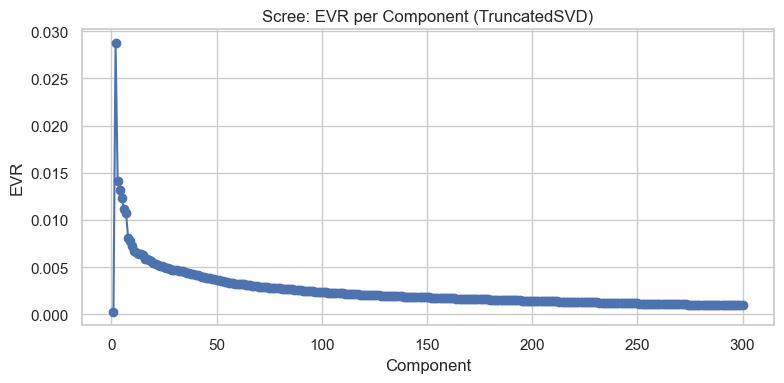

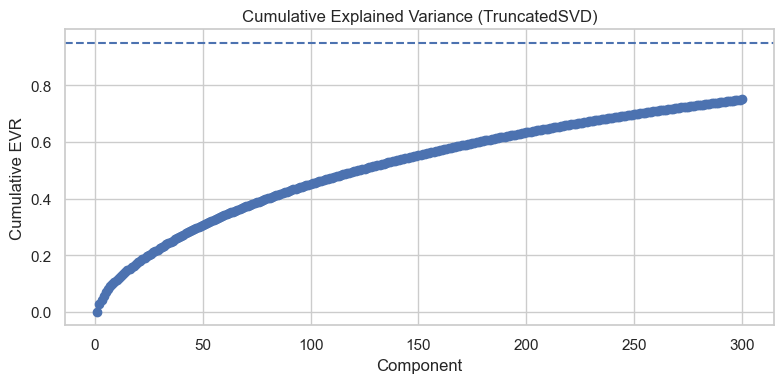

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from scipy import sparse

# choose component cap
n_features = X_train_std.shape[1]
n_components_try = max(2, min(300, n_features - 1))
evr_target = 0.95

if sparse.issparse(X_train_std):
    # SVD path (sparse)
    svd = TruncatedSVD(n_components=n_components_try, random_state=42)
    X_train_pcs = svd.fit_transform(X_train_std)
    X_test_pcs  = svd.transform(X_test_std)
    evr = svd.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "TruncatedSVD"
else:
    # PCA path (dense)
    # randomized solver is fast for many features/samples
    pca = PCA(n_components=n_components_try, svd_solver='randomized', random_state=42)
    X_train_pcs = pca.fit_transform(X_train_std)
    X_test_pcs  = pca.transform(X_test_std)
    evr = pca.explained_variance_ratio_
    cum_evr = np.cumsum(evr)
    k = int(np.searchsorted(cum_evr, evr_target) + 1)
    k = max(2, min(k, n_components_try))
    model_used = "PCA (randomized)"

print(f"{model_used}: tried {n_components_try} comps; "
      f"{k} comps reach ~{cum_evr[k-1]:.3f} cumulative variance.")

# keep first k
X_train_pca_std = X_train_pcs[:, :k]
X_test_pca_std  = X_test_pcs[:, :k]

pc_cols = [f"PC{i}" for i in range(1, k+1)]
train_ids = (sampled_data['train_numerical'].set_index('Id').index
             if 'Id' in sampled_data['train_numerical'].columns else None)
test_ids  = (sampled_data_test['test_numerical'].set_index('Id').index
             if 'Id' in sampled_data_test['test_numerical'].columns else None)

train_pca_std_df = pd.DataFrame(X_train_pca_std, index=train_ids, columns=pc_cols)
test_pca_std_df  = pd.DataFrame(X_test_pca_std,  index=test_ids,  columns=pc_cols)

# scree plots
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(evr)+1), evr, marker='o')
plt.title(f"Scree: EVR per Component ({model_used})")
plt.xlabel("Component"); plt.ylabel("EVR")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(cum_evr)+1), cum_evr, marker='o')
plt.axhline(evr_target, ls='--')
plt.title(f"Cumulative Explained Variance ({model_used})")
plt.xlabel("Component"); plt.ylabel("Cumulative EVR")
plt.tight_layout(); plt.show()



## Modeling
- Logistic regression model - L1 regularization
- Decision tree model (Tree depth (n=5))
- Hyper parameter tuning for both logistic regression and decision tree

In [59]:
import os
# Limit BLAS threads to avoid oversubscription (helps RAM/CPU thrash)
# Got this hint from the internet
os.environ.setdefault("OMP_NUM_THREADS", "1")
os.environ.setdefault("MKL_NUM_THREADS", "1")


from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import sparse

# Reload sampled data
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

assert 'Response' in train_num.columns, "Expected 'Response' in train_numerical"
y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test columns to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# OHE factory that reduces cardinality + returns sparse
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels automatically
        return OneHotEncoder(
            handle_unknown='infrequent_if_exist',
            min_frequency=10,            
            sparse_output=True
        )
    except TypeError:
        try:
            return OneHotEncoder(
                handle_unknown='ignore',
                max_categories=50,
                sparse=True
            )
        except TypeError:
            return OneHotEncoder(
                handle_unknown='ignore',
                sparse=True
            )

ohe_linear = make_ohe_slim()
ohe_tree   = make_ohe_slim()

# Preprocessors
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_linear)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0   # always prefer sparse if any block is sparse
)

preproc_tree = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     ohe_tree)
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)





## I performed dimensionality reduced before the classifier (often best for OHE-heavy data) and reran the program and its still running after 12 hours without completing the kernal. I determined that the bottlenecks are: (1) refitting OHE+SVD inside every CV fold, (2) too many candidates/folds, and (3) using a heavy solver on high-dim data.
## To make it run faster, I did the following: 
- Tune on a stratified subset (30k rows), then refit best params on the full 100k.
- Use HalvingRandomSearchCV (successive halving) with 3-fold CV.
- Shrink SVD to ~50 comps and n_iter=2.
- Use L1 + liblinear (binary) after SVD (way faster than saga here).
- For the tree, compress the categorical branch with OHE → SVD inside the ColumnTransformer (dramatically fewer features).

In [62]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy.stats import loguniform

from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Pull sampled data 
train_num = sampled_data['train_numerical'].copy()
train_cat = sampled_data['train_categorical'].copy()
test_num  = sampled_data_test['test_numerical'].copy()
test_cat  = sampled_data_test['test_categorical'].copy()

for df in (train_num, train_cat, test_num, test_cat):
    if 'Id' in df.columns:
        df.set_index('Id', inplace=True)

y = train_num['Response'].astype(int)
train_num = train_num.drop(columns=['Response'])

# Align test to train columns
test_num = test_num.reindex(columns=train_num.columns, fill_value=np.nan)
test_cat = test_cat.reindex(columns=train_cat.columns, fill_value=np.nan)

numeric_features = train_num.columns.tolist()
categorical_features = train_cat.columns.tolist()

X_train_raw = pd.concat([train_num, train_cat], axis=1)
X_test_raw  = pd.concat([test_num,  test_cat],  axis=1)

# Slimmer OHE to cut width
def make_ohe_slim():
    try:
        # Newer sklearn: group rare levels
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

# Pipelines (FAST)
# (a) Logistic (L1) path: numeric (impute+scale) + categorical (OHE) to SVD(50) to L1 liblinear
preproc_linear = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler',  StandardScaler()),
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

logit_pipe_fast = Pipeline([
    ('prep', preproc_linear),
    ('svd',  TruncatedSVD(n_components=50, n_iter=2, random_state=42)),
    ('clf',  LogisticRegression(
        penalty='l1', solver='liblinear',
        max_iter=2000, tol=1e-3, random_state=42
    ))
])

# (b) Decision Tree path: numeric (impute) + categorical (OHE to SVD(50)) ; concat to DT
preproc_tree_fast = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=50, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

tree_pipe_fast = Pipeline([
    ('prep', preproc_tree_fast),
    ('clf',  DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Make a 30k stratified tuning subset
sss = StratifiedShuffleSplit(n_splits=1, train_size=min(30000, len(X_train_raw)), random_state=42)
tune_idx, _ = next(sss.split(X_train_raw, y))
X_tune = X_train_raw.iloc[tune_idx]
y_tune = y.iloc[tune_idx]

# HalvingRandomSearchCV (3-fold, small search)
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scorer = 'roc_auc'

logit_search = HalvingRandomSearchCV(
    estimator=logit_pipe_fast,
    param_distributions={
        'clf__C': loguniform(1e-3, 1e0),             # 0.001..1
        'clf__class_weight': [None, 'balanced'],
        'svd__n_components': [30, 50, 80],
    },
    factor=2,              
    min_resources=8000,    # start with 8k samples then ramp up
    resource='n_samples',
    cv=cv3,
    n_jobs=1,              # safest for RAM
    verbose=1,
    random_state=42,
    refit=True
)

tree_search = HalvingRandomSearchCV(
    estimator=tree_pipe_fast,
    param_distributions={
        'clf__max_depth': [3, 5, 7, 9],
        'clf__min_samples_split': [2, 20, 100],
        'clf__min_samples_leaf': [1, 10, 50],
        'clf__class_weight': [None, 'balanced'],
        # Try a couple SVD sizes for the cat branch:
        'prep__cat_svd__svd__n_components': [30, 50, 80],
    },
    factor=2,
    min_resources=8000,
    resource='n_samples',
    cv=cv3,
    n_jobs=1,
    verbose=1,
    random_state=42,
    refit=True
)

print("=== Halving search (Logistic L1 + SVD) on 30k subset ===")
logit_search.fit(X_tune, y_tune)
print("Best AUC (tune):", logit_search.best_score_)
print("Best params:", logit_search.best_params_)

print("\n=== Halving search (Decision Tree + cat SVD) on 30k subset ===")
tree_search.fit(X_tune, y_tune)
print("Best AUC (tune):", tree_search.best_score_)
print("Best params:", tree_search.best_params_)

# ---------- 5) Refit best pipelines on FULL train, then predict TEST ----------
best_logit = logit_search.best_estimator_
best_tree  = tree_search.best_estimator_

best_logit.fit(X_train_raw, y)
best_tree.fit(X_train_raw, y)

test_proba_logit = best_logit.predict_proba(X_test_raw)[:, 1]
test_proba_tree  = best_tree.predict_proba(X_test_raw)[:, 1]

test_ids = X_test_raw.index
preds_df = pd.DataFrame({
    'Id': test_ids,
    'proba_logit_l1': test_proba_logit,
    'proba_tree':     test_proba_tree
})
preds_df.head()




=== Halving search (Logistic L1 + SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best AUC (tune): 0.9939996249765611
Best params: {'clf__C': 0.013292918943162165, 'clf__class_weight': None, 'svd__n_components': 80}

=== Halving search (Decision Tree + cat SVD) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fi

,Id,proba_logit_l1,proba_tree
0,40,0.005025,0.522942
1,150,0.005462,0.522942
2,172,0.005210,0.000000
3,222,0.004880,0.137962
4,369,0.011620,0.000000


## Evaluation
- F1 Score
- Precision
- RMSE
- Matthews Correlation Coefficient (MCC) between the predicted and the observed (will be done for the final project)

In [63]:
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    mean_squared_error, confusion_matrix, classification_report
)

# Make a stratified hold-out split (20% for validation)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, val_idx = next(sss.split(X_train_raw, y))

X_tr, X_val = X_train_raw.iloc[train_idx], X_train_raw.iloc[val_idx]
y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

# Evaluate a pipeline on the hold-out
def evaluate_pipeline(pipeline, name: str, threshold: float = 0.5):
    # clone to avoid mutating tuned objects
    model = clone(pipeline)
    model.fit(X_tr, y_tr)

    # hard preds at given threshold (use predict_proba for consistent thresholding)
    y_proba = model.predict_proba(X_val)[:, 1]
    y_pred  = (y_proba >= threshold).astype(int)

    # metrics
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall    = recall_score(y_val, y_pred, zero_division=0)
    f1        = f1_score(y_val, y_pred, zero_division=0)

    # RMSE probabilities and label computed:
    rmse_prob  = np.sqrt(mean_squared_error(y_val, y_proba))   # on probabilities
    rmse_label = np.sqrt(mean_squared_error(y_val, y_pred))    # on 0/1 predictions

    cm = confusion_matrix(y_val, y_pred)

    print(f"\n=== {name} @ threshold={threshold:.2f} ===")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"RMSE (prob):  {rmse_prob:.4f}")
    print(f"RMSE (label): {rmse_label:.4f}")
    print("Confusion matrix [TN FP; FN TP]:\n", cm)

    return {
        "Model": name,
        "Threshold": threshold,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "RMSE_prob": rmse_prob,
        "RMSE_label": rmse_label
    }

# Choose a threshold that maximizes F1 on the val set
def best_f1_threshold(pipeline, grid=np.linspace(0.1, 0.9, 17)):
    model = clone(pipeline).fit(X_tr, y_tr)
    y_proba = model.predict_proba(X_val)[:, 1]
    best_th, best_f1 = 0.5, -1.0
    for th in grid:
        f1 = f1_score(y_val, (y_proba >= th).astype(int), zero_division=0)
        if f1 > best_f1:
            best_f1, best_th = f1, th
    return best_th, best_f1

# Find per-model best thresholds (fast) and evaluate at both 0.5 and best-F1
results = []

# Logistic (L1)
th_logit, f1_logit = best_f1_threshold(best_logit)
results.append(evaluate_pipeline(best_logit, "Logistic L1", threshold=0.5))
results.append(evaluate_pipeline(best_logit, "Logistic L1 (best-F1 th)", threshold=th_logit))

# Decision Tree
th_tree, f1_tree = best_f1_threshold(best_tree)
results.append(evaluate_pipeline(best_tree, "Decision Tree (depth≈5)", threshold=0.5))
results.append(evaluate_pipeline(best_tree, "Decision Tree (best-F1 th)", threshold=th_tree))

# Compact comparison table
eval_df = pd.DataFrame(results)
eval_df = eval_df[["Model", "Threshold", "Precision", "F1", "RMSE_prob", "RMSE_label"]]
eval_df.sort_values(by=["F1", "Precision"], ascending=False, inplace=True)
eval_df.reset_index(drop=True, inplace=True)
eval_df



=== Logistic L1 @ threshold=0.50 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0750
RMSE (label): 0.0752
Confusion matrix [TN FP; FN TP]:
 [[19869     0]
 [  113     0]]

=== Logistic L1 (best-F1 th) @ threshold=0.10 ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
RMSE (prob):  0.0750
RMSE (label): 0.0752
Confusion matrix [TN FP; FN TP]:
 [[19869     0]
 [  113     0]]

=== Decision Tree (depth≈5) @ threshold=0.50 ===
Precision: 0.0103 | Recall: 0.5575 | F1: 0.0202
RMSE (prob):  0.3888
RMSE (label): 0.5529
Confusion matrix [TN FP; FN TP]:
 [[13811  6058]
 [   50    63]]

=== Decision Tree (best-F1 th) @ threshold=0.90 ===
Precision: 0.1004 | Recall: 0.2301 | F1: 0.1398
RMSE (prob):  0.3888
RMSE (label): 0.1265
Confusion matrix [TN FP; FN TP]:
 [[19636   233]
 [   87    26]]


,Model,Threshold,Precision,F1,RMSE_prob,RMSE_label
0,Decision Tree (best-F1 th),0.9,0.100386,0.139785,0.388838,0.126548
1,Decision Tree (depth≈5),0.5,0.010292,0.020212,0.388838,0.552879
2,Logistic L1,0.5,0.000000,0.000000,0.074961,0.075200
3,Logistic L1 (best-F1 th),0.1,0.000000,0.000000,0.074961,0.075200


## Based on the Module 20 lesson on Voting Classifier, I am tyring to determine if adding a Voting Classifier will help improve the F1 and precision scores. I investigated both Hard and Soft voting. ## I re-ran the above Voting Classifier code with weight ratio of 3:1 for Decision_Tree:Logistic Regression. This is because, in the original model, Decision Tree performed better than Logistic Regression. 

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Option A: HARD voting
hard_voter = VotingClassifier(
    estimators=[('logit', best_logit), ('tree', best_tree)],
    voting='hard',
    n_jobs=1
)
hard_voter.fit(X_tr, y_tr)
y_pred_hard = hard_voter.predict(X_val)

# Manually build a probability score for AUC (since voting='hard' has no predict_proba)
probas = []
for name, est in hard_voter.named_estimators_.items():
    if hasattr(est, "predict_proba"):
        probas.append(est.predict_proba(X_val)[:, 1])
    elif hasattr(est, "decision_function"):
        df = est.decision_function(X_val)
        # Min-max to [0,1] so roc_auc_score can use it
        s = (df - df.min()) / (df.max() - df.min() + 1e-12)
        probas.append(s)
# Average scores across members (unweighted, consistent with hard voting)
y_score_hard = np.mean(probas, axis=0) if len(probas) > 0 else y_pred_hard.astype(float)
auc_hard = roc_auc_score(y_val, y_score_hard)

print("\n=== VotingClassifier (HARD) — Logistic L1 + Decision Tree ===")
print(f"AUC: {auc_hard:.4f} | "
      f"Precision: {precision_score(y_val, y_pred_hard, zero_division=0):.4f} | "
      f"Recall: {recall_score(y_val, y_pred_hard, zero_division=0):.4f} | "
      f"F1: {f1_score(y_val, y_pred_hard, zero_division=0):.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_hard))


# Option B: SOFT voting
soft_voter = VotingClassifier(
    estimators=[('logit', best_logit), ('tree', best_tree)],
    voting='soft',
    weights=[1, 3],
    n_jobs=1
)
soft_voter.fit(X_tr, y_tr)

y_proba_soft = soft_voter.predict_proba(X_val)[:, 1]
y_pred_soft_05 = (y_proba_soft >= 0.5).astype(int)
auc_soft = roc_auc_score(y_val, y_proba_soft)

print("\n=== VotingClassifier (SOFT @ threshold=0.50) — Logistic L1 + Decision Tree ===")
print(f"AUC: {auc_soft:.4f} | "
      f"Precision: {precision_score(y_val, y_pred_soft_05, zero_division=0):.4f} | "
      f"Recall: {recall_score(y_val, y_pred_soft_05, zero_division=0):.4f} | "
      f"F1: {f1_score(y_val, y_pred_soft_05, zero_division=0):.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_soft_05))


# Option C: SOFT voting @ best-F1 threshold
def best_f1_threshold_for(ensemble, X_val, y_val, grid=np.linspace(0.05, 0.95, 19)):
    proba = ensemble.predict_proba(X_val)[:, 1]
    best_th, best_f1 = 0.5, -1.0
    for th in grid:
        f1 = f1_score(y_val, (proba >= th).astype(int), zero_division=0)
        if f1 > best_f1:
            best_th, best_f1 = th, f1
    return best_th, best_f1

best_th, best_f1 = best_f1_threshold_for(soft_voter, X_val, y_val)
y_pred_soft_best = (y_proba_soft >= best_th).astype(int)
# AUC is threshold-free; reuse y_proba_soft
auc_soft_best = roc_auc_score(y_val, y_proba_soft)

print(f"\n=== VotingClassifier (SOFT @ best-F1 threshold={best_th:.2f}) — Logistic L1 + Decision Tree ===")
print(f"AUC: {auc_soft_best:.4f} | "
      f"Precision: {precision_score(y_val, y_pred_soft_best, zero_division=0):.4f} | "
      f"Recall: {recall_score(y_val, y_pred_soft_best, zero_division=0):.4f} | "
      f"F1: {f1_score(y_val, y_pred_soft_best, zero_division=0):.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_soft_best))




=== VotingClassifier (HARD) — Logistic L1 + Decision Tree ===
AUC: 0.6680 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
Confusion matrix [TN FP; FN TP]:
 [[19869     0]
 [  113     0]]

=== VotingClassifier (SOFT @ threshold=0.50) — Logistic L1 + Decision Tree ===
AUC: 0.6680 | Precision: 0.0293 | Recall: 0.2743 | F1: 0.0530
Confusion matrix [TN FP; FN TP]:
 [[18843  1026]
 [   82    31]]

=== VotingClassifier (SOFT @ best-F1 threshold=0.70) — Logistic L1 + Decision Tree ===
AUC: 0.6680 | Precision: 0.1176 | Recall: 0.2301 | F1: 0.1557
Confusion matrix [TN FP; FN TP]:
 [[19674   195]
 [   87    26]]


## Original run: Results from VotingClassifier with balanced weights: 
## === VotingClassifier (HARD) — Logistic L1 + Decision Tree ===
Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
Confusion matrix [TN FP; FN TP]:
 [[19870     0]
 [  112     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19870
           1       0.00      0.00      0.00       112

    accuracy                           0.99     19982
   macro avg       0.50      0.50      0.50     19982
weighted avg       0.99      0.99      0.99     19982


=== VotingClassifier (SOFT, th=0.50) — Logistic L1 + Decision Tree ===
Precision: 0.5000 | Recall: 0.0089 | F1: 0.0175
Confusion matrix [TN FP; FN TP]:
 [[19869     1]
 [  111     1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     19870
           1       0.50      0.01      0.02       112

    accuracy                           0.99     19982
   macro avg       0.75      0.50      0.51     19982
weighted avg       0.99      0.99      0.99     19982


Best-F1 threshold for SOFT voter: 0.45 | F1: 0.1232
Confusion matrix [TN FP; FN TP]:
 [[19723   147]
 [   95    17]]

## Now, I will use XGBoost to see if the performance is better. It uses a preprocessing path for trees (no scaling), compresses high-cardinality OHE with SVD, tunes a small hyperparam space with HalvingRandomSearchCV, and then evaluates with both 0.5 and best-F1 thresholds.

In [51]:
pip install xgboost

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Class imbalance weight (helps XGBoost)
pos = int(y.sum())
neg = int(len(y) - pos)
scale_pos_weight = (neg / max(pos, 1))
print(f"scale_pos_weight ~ {scale_pos_weight:.1f}  (neg={neg}, pos={pos})")

# Preprocessor for XGB (tree-friendly): median impute for num; OHE to SVD for categorical
def make_ohe_slim():
    try:
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=10, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=50, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

preproc_xgb = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat_svd', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_slim()),
            ('svd',     TruncatedSVD(n_components=100, n_iter=2, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

# XGB pipeline 
xgb_base = XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    eval_metric='auc',
    n_estimators=400,          # will be tuned
    learning_rate=0.1,         # will be tuned
    max_depth=6,               # will be tuned
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=1                   
)

xgb_pipe = Pipeline([
    ('prep', preproc_xgb),
    ('clf',  xgb_base),
])

# Light-weight hyperparam search on the 30k tune subset
cv3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_dist = {
    'clf__n_estimators': [300, 500, 800],
    'clf__learning_rate': [0.05, 0.1, 0.2],
    'clf__max_depth': [4, 6, 8],
    'clf__subsample': [0.7, 0.85, 1.0],
    'clf__colsample_bytree': [0.7, 0.9, 1.0],
    'clf__reg_lambda': [0.5, 1.0, 2.0],
}

print("\n=== Halving search (XGB) on 30k subset ===")
xgb_search = HalvingRandomSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    factor=2,
    min_resources=8000,        
    resource='n_samples',
    cv=cv3,
    scoring='roc_auc',
    n_jobs=1,
    random_state=42,
    verbose=1,
    refit=True
)

xgb_search.fit(X_tune, y_tune)
print("Best AUC (tune):", xgb_search.best_score_)
print("Best params:", xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_

# Evaluate the X_val, y_val
# Fixed 0.5 threshold
y_proba = best_xgb.predict_proba(X_val)[:, 1]
y_pred_05 = (y_proba >= 0.5).astype(int)

auc  = roc_auc_score(y_val, y_proba)
prec = precision_score(y_val, y_pred_05, zero_division=0)
rec  = recall_score(y_val, y_pred_05, zero_division=0)
f1   = f1_score(y_val, y_pred_05, zero_division=0)

print("\n=== XGBoost @ threshold=0.50 ===")
print(f"AUC: {auc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_05))

# Best-F1 threshold (often better on imbalanced data)
ths = np.linspace(0.05, 0.95, 19)
best_th, best_f1 = 0.5, -1.0
for t in ths:
    f1t = f1_score(y_val, (y_proba >= t).astype(int), zero_division=0)
    if f1t > best_f1:
        best_f1, best_th = f1t, t

y_pred_best = (y_proba >= best_th).astype(int)
prec_b = precision_score(y_val, y_pred_best, zero_division=0)
rec_b  = recall_score(y_val, y_pred_best, zero_division=0)

print(f"\n=== XGBoost @ best-F1 threshold={best_th:.2f} ===")
print(f"AUC: {auc:.4f} | Precision: {prec_b:.4f} | Recall: {rec_b:.4f} | F1: {best_f1:.4f}")
print("Confusion matrix [TN FP; FN TP]:\n", confusion_matrix(y_val, y_pred_best))

scale_pos_weight ~ 164.7  (neg=99321, pos=603)

=== Halving search (XGB) on 30k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 8000
max_resources_: 30000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 3
n_resources: 8000
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 1
n_candidates: 2
n_resources: 16000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best AUC (tune): 0.5998508361529263
Best params: {'clf__subsample': 0.7, 'clf__reg_lambda': 1.0, 'clf__n_estimators': 800, 'clf__max_depth': 4, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 0.7}

=== XGBoost @ threshold=0.50 ===
AUC: 0.5753 | Precision: 0.2667 | Recall: 0.0331 | F1: 0.0588
Confusion matrix [TN FP; FN TP]:
 [[19853    11]
 [  117     4]]

=== XGBoost @ best-F1 threshold=0.60 ===
AUC: 0.5753 | Precision: 0.3333 | Recall: 0.0331 | F1: 0.0602
Confusion matrix [TN FP; FN TP]:
 [[19856     8]
 [  117     4]]


## I will now investigate RandomForest to compare with the results from XGBoost. I trimmed search space, uses HalvingRandomSearchCV, lowers SVD size, increases category bucketing, and parallelizes trees. 

In [54]:
 # Random Forest
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import HalvingRandomSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, f1_score, confusion_matrix

# Shrink the tuning subset further (e.g., 15k) to speed up
sss_fast = StratifiedShuffleSplit(n_splits=1, train_size=min(15000, len(X_tune)), random_state=42)
idx_fast, _ = next(sss_fast.split(X_tune, y_tune))
X_tune_fast = X_tune.iloc[idx_fast]
y_tune_fast = y_tune.iloc[idx_fast]

def make_ohe_fast():
    try:
        return OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=30, sparse_output=True)
    except TypeError:
        try:
            return OneHotEncoder(handle_unknown='ignore', max_categories=30, sparse=True)
        except TypeError:
            return OneHotEncoder(handle_unknown='ignore', sparse=True)

preproc_fast = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='<<MISSING>>')),
            ('ohe',     make_ohe_fast()),
            ('svd',     TruncatedSVD(n_components=100, n_iter=1, random_state=42))
        ]), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)

rf_fast = RandomForestClassifier(
    n_estimators=300,
    max_depth=16,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
)

rf_pipe_fast = Pipeline([
    ('prep', preproc_fast),
    ('clf',  rf_fast),
])

# Trimmed param space (small, fast)
param_dist_fast = {
    'prep__cat__svd__n_components': [80, 100, 140],
    'clf__n_estimators'           : [200, 300, 400],
    'clf__max_depth'              : [12, 16, 20],
    'clf__min_samples_leaf'       : [1, 2, 5],
    'clf__min_samples_split'      : [2, 5, 10],
    'clf__max_features'           : ['sqrt', 0.3, 0.5],
}

cv2 = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # 2-fold speeds things up

rf_halving = HalvingRandomSearchCV(
    estimator=rf_pipe_fast,
    param_distributions=param_dist_fast,
    factor=2,
    min_resources=6000,                # start smaller
    resource='n_samples',
    cv=cv2,
    scoring='average_precision',       # AUC-PR
    n_jobs=1,                          # avoid nested parallelism
    verbose=1,
    random_state=42,
    refit=True
)

print("=== FAST RF halving search on ~15k subset ===")
rf_halving.fit(X_tune_fast, y_tune_fast)
best_rf_fast = rf_halving.best_estimator_
print("Best AUC-PR (tune):", rf_halving.best_score_)
print("Best params:", rf_halving.best_params_)

# Evaluate on hold-out
proba = best_rf_fast.predict_proba(X_val)[:, 1]
pred05 = (proba >= 0.50).astype(int)

aucroc = roc_auc_score(y_val, proba)
aupr  = average_precision_score(y_val, proba)
p05 = precision_score(y_val, pred05, zero_division=0)
r05 = recall_score(y_val, pred05, zero_division=0)
f05 = f1_score(y_val, pred05, zero_division=0)

print("\n=== FAST RF @ threshold=0.50 ===")
print(f"AUC-ROC: {aucroc:.4f} | AUC-PR: {aupr:.4f} | Precision: {p05:.4f} | Recall: {r05:.4f} | F1: {f05:.4f}")
print("CM [TN FP; FN TP]:\n", confusion_matrix(y_val, pred05))

# Best-F1 threshold (restricted low range for imbalance)
ths = np.linspace(0.02, 0.30, 15)
best_th = max(ths, key=lambda t: f1_score(y_val, (proba >= t).astype(int), zero_division=0))
predB = (proba >= best_th).astype(int)

# FIX: use predB (not y_pred_best)
pB = precision_score(y_val, predB, zero_division=0)
rB = recall_score(y_val, predB, zero_division=0)
fB = f1_score(y_val, predB, zero_division=0)
cmB = confusion_matrix(y_val, predB)

print(f"\n=== FAST RF @ threshold={best_th:.2f} ===")
print(f"AUC-ROC: {aucroc:.4f} | AUC-PR: {aupr:.4f} | Precision: {pB:.4f} | Recall: {rB:.4f} | F1: {fB:.4f}")
print("CM [TN FP; FN TP]:\n", cmB)



=== FAST RF halving search on ~15k subset ===
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 6000
max_resources_: 15000
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 2
n_resources: 6000
Fitting 2 folds for each of 2 candidates, totalling 4 fits
----------
iter: 1
n_candidates: 1
n_resources: 12000
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best AUC-PR (tune): 0.012124136998109984
Best params: {'prep__cat__svd__n_components': 80, 'clf__n_estimators': 300, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 0.3, 'clf__max_depth': 12}

=== FAST RF @ threshold=0.50 ===
AUC-ROC: 0.5837 | AUC-PR: 0.0116 | Precision: 0.0000 | Recall: 0.0000 | F1: 0.0000
CM [TN FP; FN TP]:
 [[19861     3]
 [  121     0]]

=== FAST RF @ threshold=0.24 ===
AUC-ROC: 0.5837 | AUC-PR: 0.0116 | Precision: 0.0274 | Recall: 0.0744 | F1: 0.0401
CM [TN FP; FN TP]:
 [[19545   319]
 [  112     9]]
